<a href="https://colab.research.google.com/github/gruszek961/Data_mining_projekt/blob/main/ml_w_finansach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ładowanie bibliotek

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import numpy as np
import copy
import matplotlib.pyplot as plt

Ładowanie danych

In [ ]:
# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets
df = pd.merge(X, y, left_index=True, right_index=True)
# metadata
# print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
# print(online_shoppers_purchasing_intention_dataset.variables)

podział na dane numeryczne i kategoryzacyjne

In [ ]:
features = df.columns.tolist()
num_features = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration", "ProductRelated","ProductRelated_Duration","BounceRates", "ExitRates", "PageValues", "SpecialDay"]
cat_features = [x for x in features if x not in set(num_features)]
cat_features.remove('Revenue')

Definiowane funkcje:
* funkcja IV

In [ ]:
def calc_iv(df, feature, target, pr=0):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data['IV'].values[0]

* Funkcja do wykresów dla rozkładów zmiennych kategorycznych

In [ ]:
def summary_cat(df, feature, target):
  test = df.groupby(feature).agg(feature_count=(feature, 'count'),Total_revenue=(target, 'sum'))
  test['feature_percentage'] = test['feature_count'] / test['feature_count'].sum() * 100
  test['target_percentage'] = test['Total_revenue'] / test['feature_count'] * 100
  return test


def plt_cat(sum_df, feature, target):
  plot = sns.set_theme(style="whitegrid")
  ax = sns.barplot(data=sum_df, x=feature, y="feature_percentage", color="blue", alpha=0.6)
  ax.set_ylabel("Percentage")
  ax.set_title("feature Distribution")
  sns.lineplot(data=sum_df, x=feature, y="target_percentage", color="red", marker="o", ax=ax)



def create_plots(df,features, target):
    num_features = len(cat_features)
    fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

    for i, feature in enumerate(cat_features):
        sum_df = summary_cat(df, feature, target)
        plt_cat(sum_df, feature, axes[i])

    plt.tight_layout()
    plt.show()

Eksploracja danych:
* Zmienna objaśniana

<Axes: >

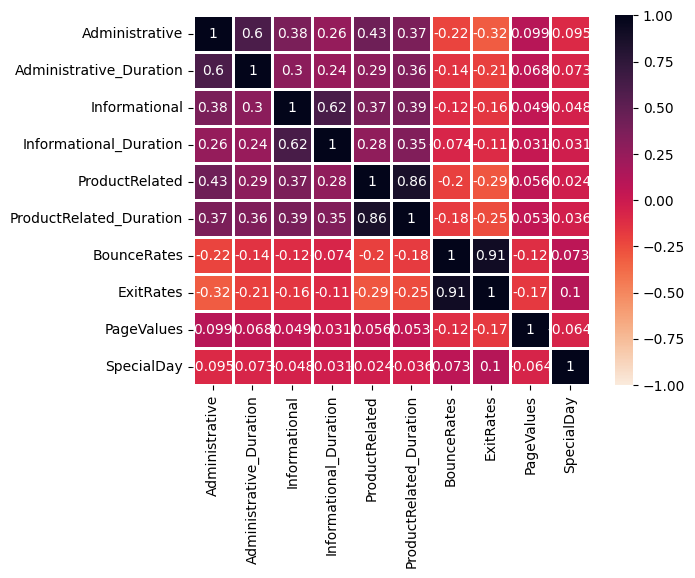

In [ ]:
sns.heatmap(X[num_features].corr(), vmin=-1, vmax=1,linewidths=1,
annot=True,cmap="rocket_r")

In [ ]:
tescik = summary_cat(df, 'OperatingSystems', 'Revenue')

In [ ]:
tescik

,feature_count,Total_revenue,feature_percentage,target_percentage
OperatingSystems,,,,
1,2585,379,20.965126,14.661509
2,6601,1155,53.536091,17.497349
3,2555,268,20.721817,10.489237
4,478,85,3.876723,17.782427
5,6,1,0.048662,16.666667
6,19,2,0.154096,10.526316
7,7,1,0.056772,14.285714
8,79,17,0.640714,21.518987


In [ ]:
tescik.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 1 to 8
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   feature_count       8 non-null      int64  
 1   Total_revenue       8 non-null      int64  
 2   feature_percentage  8 non-null      float64
 3   target_percentage   8 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 320.0 bytes


In [ ]:
def summary_cat(df, feature, target):
    test = df.groupby(feature).agg(feature_count=(feature, 'count'), Total_revenue=(target, 'sum'))
    test['feature_percentage'] = test['feature_count'] / test['feature_count'].sum() * 100
    test['target_percentage'] = test['Total_revenue'] / test['feature_count'] * 100
    return test

def plt_cat(sum_df, feature, ax):
    sns.set_theme(style="whitegrid")
    sns.barplot(data=sum_df, x=sum_df.index, y="feature_percentage", color="blue", alpha=0.6, ax=ax)
    ax.set_ylabel("Percentage")
    ax.set_title(f"{feature} Distribution")
    sns.lineplot(data=sum_df, x=sum_df.index, y="target_percentage", color="red", marker="o", ax=ax)

def create_plots(df, cat_features, target):
    num_features = len(cat_features)
    fig = plt.figure(figsize=(10, 5 * num_features))

    for i, feature in enumerate(cat_features):
        ax = fig.add_subplot(num_features, 1, i + 1)
        sum_df = summary_cat(df, feature, target)
        plt_cat(sum_df, feature, ax)

    plt.tight_layout()
    plt.show()


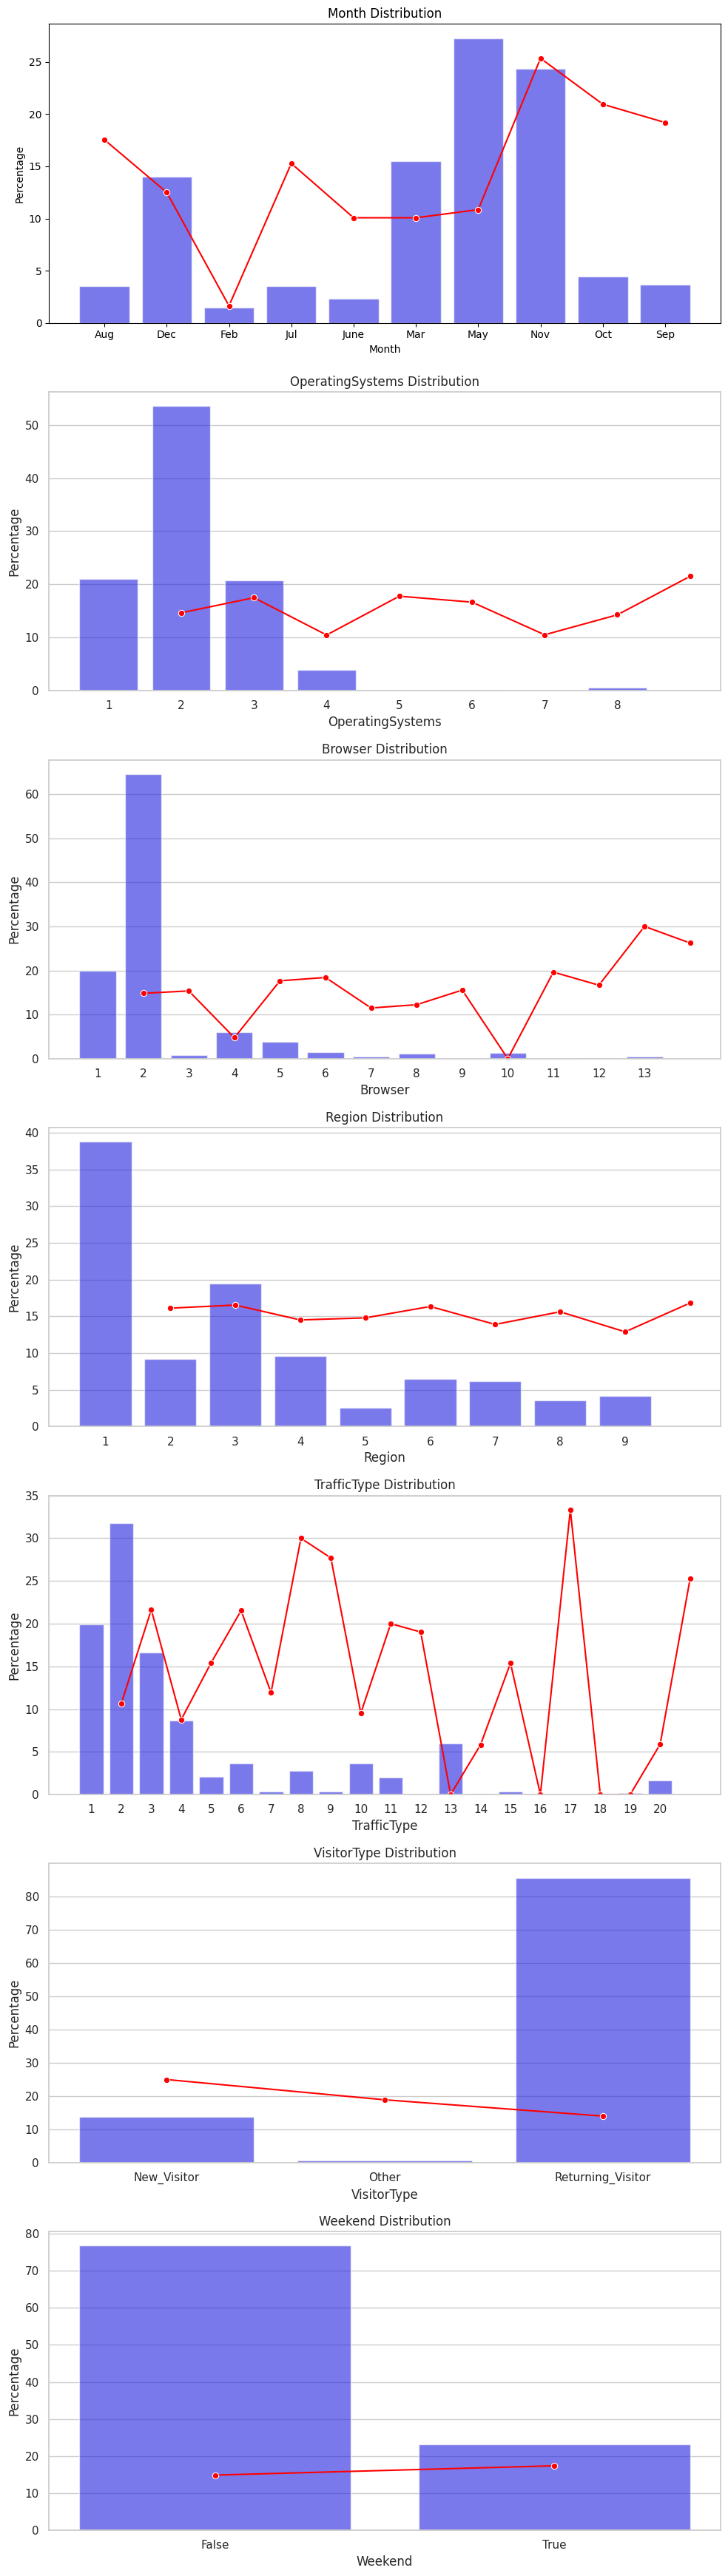

In [ ]:
create_plots(df, cat_features = cat_features, target = 'Revenue')

* zmienne kategoryczne:

In [ ]:
cat_features

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

Zmienna Month

In [ ]:
import matplotlib.pyplot as plt

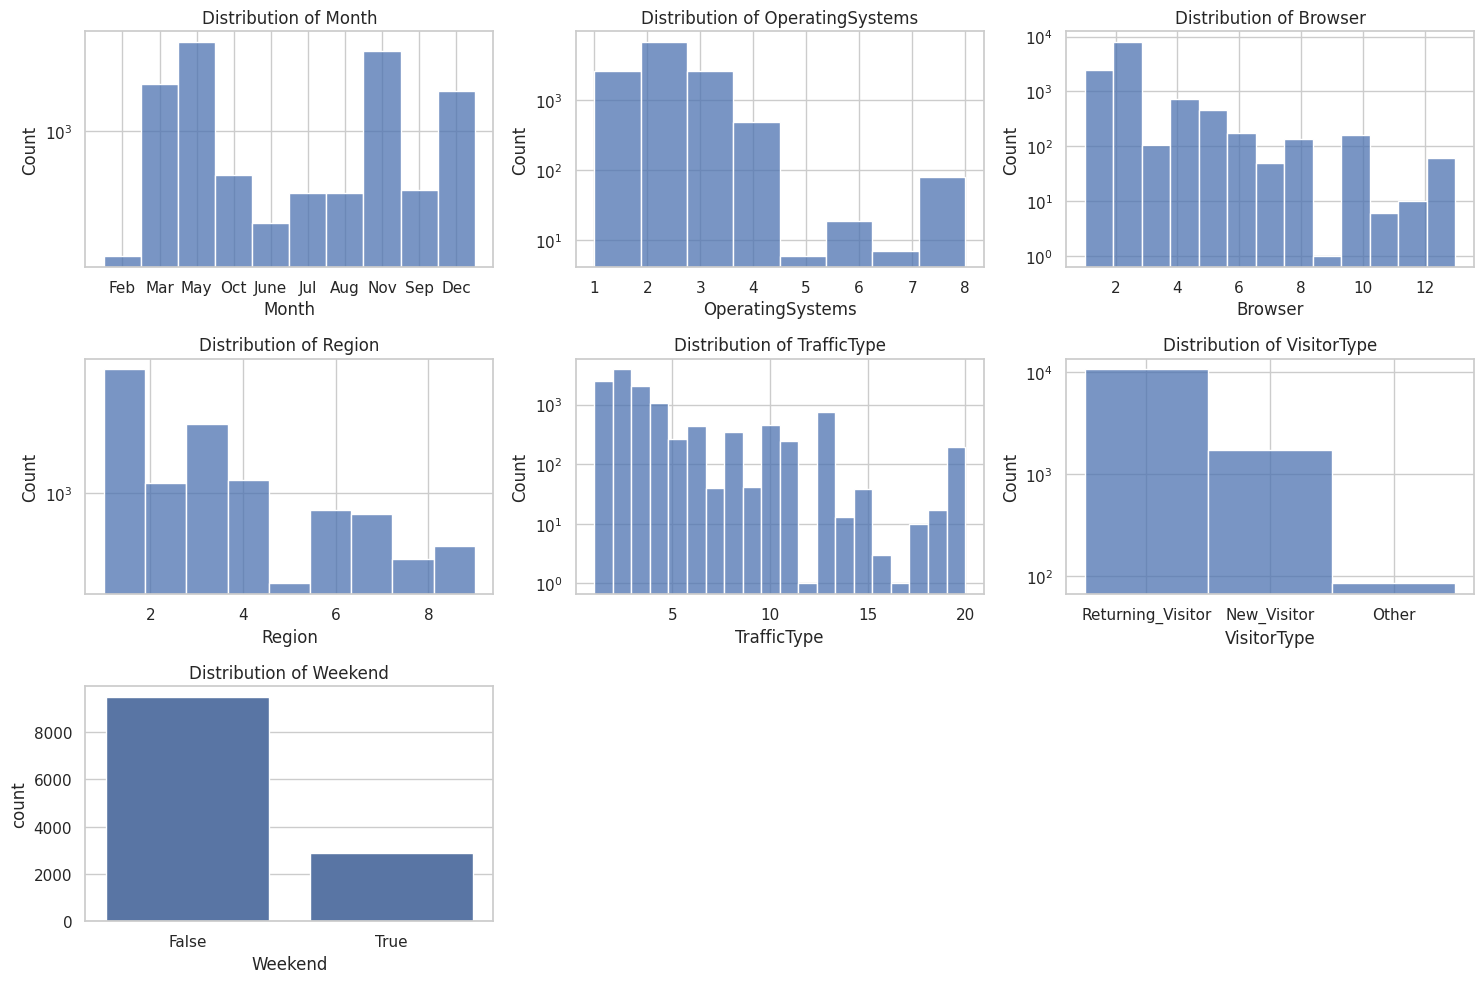

In [ ]:
plt.figure(figsize=(15, 10))

# Plots for each numerical/categorical variable


# Create a histogram for each numeric feature
for i, feature in enumerate(cat_features):
    plt.subplot(3, 3, i + 1)
    if df[feature].nunique() > 2:  # If the variable is continuous
        sns.histplot(df[feature], bins=min(30, int(df[feature].nunique())))
        plt.yscale('log')  # Applying logarithmic scale
    else:  # If the variable is categorical
        sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
months_df = summary_cat(df = df, feature = 'Month', target = 'Revenue')
months_df

,feature_count,Total_revenue,feature_percentage,target_percentage
Month,,,,
Aug,433,76,3.511760,17.551963
Dec,1727,216,14.006488,12.507238
Feb,184,3,1.492295,1.630435
Jul,432,66,3.503650,15.277778
June,288,29,2.335766,10.069444
Mar,1907,192,15.466342,10.068170
May,3364,365,27.283049,10.850178
Nov,2998,760,24.314680,25.350233
Oct,549,115,4.452555,20.947177


In [ ]:
#plt_cat(sum_df = months_df, feature = 'Month', target = 'Revenue')

In [ ]:
 calc_iv(df, feature = 'Month', target = 'Revenue', pr=0)

0.24522475802356836

OperatingSystems

In [ ]:
summary_cat(df = df, feature = 'OperatingSystems', target = 'Revenue')

,feature_count,Total_revenue,feature_percentage,target_percentage
OperatingSystems,,,,
1,2585,379,20.965126,14.661509
2,6601,1155,53.536091,17.497349
3,2555,268,20.721817,10.489237
4,478,85,3.876723,17.782427
5,6,1,0.048662,16.666667
6,19,2,0.154096,10.526316
7,7,1,0.056772,14.285714
8,79,17,0.640714,21.518987


In [ ]:
 calc_iv(df, feature = 'OperatingSystems', target = 'Revenue', pr=0)

0.05084478039910348

Browser

In [ ]:
summary_cat(df = df, feature = 'Browser', target = 'Revenue')

,feature_count,Total_revenue,feature_percentage,target_percentage
Browser,,,,
1,2462,365,19.967559,14.825345
2,7961,1223,64.566099,15.362392
3,105,5,0.851582,4.761905
4,736,130,5.969181,17.663043
5,467,86,3.787510,18.415418
6,174,20,1.411192,11.494253
7,49,6,0.397405,12.244898
8,135,21,1.094891,15.555556
9,1,0,0.008110,0.000000


In [ ]:
 calc_iv(df, feature = 'Browser', target = 'Revenue', pr=0)

0.019391108606485734

Region

In [ ]:
summary_cat(df = df, feature = 'Region', target = 'Revenue')

,feature_count,Total_revenue,feature_percentage,target_percentage
Region,,,,
1,4780,771,38.767234,16.129707
2,1136,188,9.213301,16.549296
3,2403,349,19.489051,14.523512
4,1182,175,9.586375,14.805415
5,318,52,2.579075,16.352201
6,805,112,6.528792,13.913043
7,761,119,6.171938,15.637319
8,434,56,3.519870,12.903226
9,511,86,4.144363,16.829746


In [ ]:
 calc_iv(df, feature = 'Region', target = 'Revenue', pr=0)

0.005863742602202001

TrafficType

In [ ]:
summary_cat(df = df, feature = 'TrafficType', target = 'Revenue')

,feature_count,Total_revenue,feature_percentage,target_percentage
TrafficType,,,,
1,2451,262,19.878345,10.689514
2,3913,847,31.735604,21.645796
3,2052,180,16.642336,8.771930
4,1069,165,8.669911,15.434986
5,260,56,2.108678,21.538462
6,444,53,3.600973,11.936937
7,40,12,0.324412,30.000000
8,343,95,2.781833,27.696793
9,42,4,0.340633,9.523810


In [ ]:
 calc_iv(df, feature = 'TrafficType', target = 'Revenue', pr=0)

0.2399681706721322

In [ ]:
summary_cat(df = df, feature = 'VisitorType', target = 'Revenue')

,feature_count,Total_revenue,feature_percentage,target_percentage
VisitorType,,,,
New_Visitor,1694,422,13.738848,24.911452
Other,85,16,0.689376,18.823529
Returning_Visitor,10551,1470,85.571776,13.932329


In [ ]:
summary_cat(df = df, feature = 'Weekend', target = 'Revenue')

,feature_count,Total_revenue,feature_percentage,target_percentage
Weekend,,,,
False,9462,1409,76.739659,14.891144
True,2868,499,23.260341,17.398884


In [ ]:
 calc_iv(df, feature = 'Weekend', target = 'Revenue', pr=0)

0.006349946156866303

In [ ]:
def best_combination(data, feature, target):

    columns = data.columns.tolist()

    merge_cat_agg['OperatingSystems'].replace(['3', '4-8'], '3-8', inplace=True)

    max_count = 0
    best_comb = None

    for combination in combinations:
        if fixed_column is not None:
            combination = list(combination) + [fixed_column]

        subset = df[list(combination)]
        count = subset.any(axis=1).sum()

        if count > max_count:
            max_count = count
            best_comb = combination
    return max_count, best_comb


Grupowanie kategorii w zmiennych kategorycznych:
* Month:

In [ ]:
df2 = copy.copy(df)
df2['Month'].replace(['Feb', 'Mar'], 'Q1', inplace=True)
df2['Month'].replace(['May', 'June'], 'Q2', inplace=True)
df2['Month'].replace(['Jul','Aug','Sep'], 'Q3', inplace=True)
df2['Month'].replace(['Oct', 'Dec', 'Nov'], 'Q4', inplace=True)

In [ ]:
def plt_cat(sum_df, feature, target):
    plot = sns.set_theme(style="whitegrid")
    ax = sns.barplot(data=sum_df, x=feature, y="feature_percentage", color="blue", alpha=0.6)
    ax.set_ylabel("Percentage")
    ax.set_title("feature Distribution")
    sns.lineplot(data=sum_df, x=feature, y="target_percentage", color="red", marker="o", ax=ax)

In [ ]:
def summary_cat(df, feature, target):
    test = df.groupby(feature).agg(feature_count=(feature, 'count'),Total_revenue=(target, 'sum'))
    test['feature_percentage'] = test['feature_count'] / test['feature_count'].sum() * 100
    test['target_percentage'] = test['Total_revenue'] / test['feature_count'] * 100
    return test

In [ ]:
month_comb = summary_cat(df2, 'Month', 'Revenue')

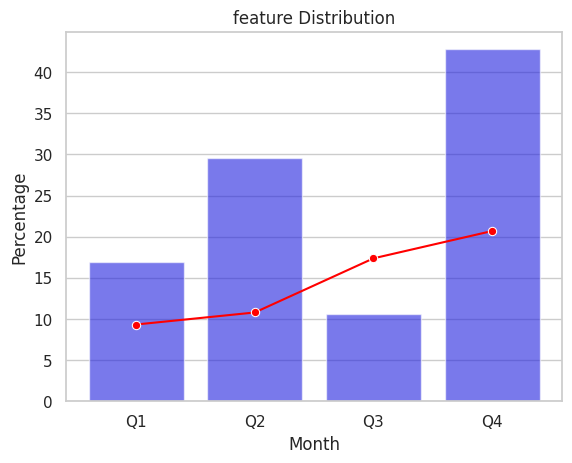

In [ ]:
plt_cat(sum_df = month_comb, feature = 'Month', target = 'Revenue')

In [ ]:
 calc_iv(df, feature = 'Month', target = 'Revenue', pr=0)

0.24522475802356836

In [ ]:
 calc_iv(df2, feature = 'Month', target = 'Revenue', pr=0)

0.15241491113266334

In [ ]:
df2['OperatingSystems'].replace([1,7], '1,7', inplace=True)
df2['OperatingSystems'].replace([3, 6], '3, 6', inplace=True)
df2['OperatingSystems'].replace([2, 4, 5, 8], '2, 4, 5, 8', inplace=True)

In [ ]:
calc_iv(df, feature = 'OperatingSystems', target = 'Revenue', pr=0)

0.05084478039910348

In [ ]:
calc_iv(df2, feature = 'OperatingSystems', target = 'Revenue', pr=0)

0.05035373710652241

In [ ]:
os_comb = summary_cat(df2, 'OperatingSystems', 'Revenue')

In [ ]:
os_comb

,feature_count,Total_revenue,feature_percentage,target_percentage
OperatingSystems,,,,
"1,7",2592,380,21.021898,14.660494
"2, 4, 5, 8",7164,1258,58.102190,17.560022
"3, 6",2574,270,20.875912,10.489510


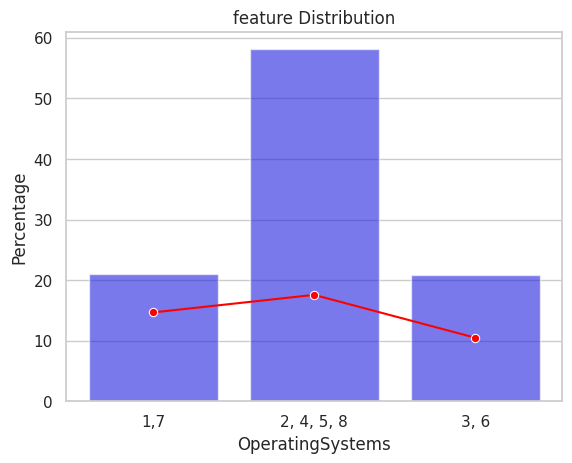

In [ ]:
plt_cat(sum_df = os_comb, feature = 'OperatingSystems', target = 'Revenue')

Regresja logistyczna

In [ ]:
calc_iv(df, feature = 'VisitorType', target = 'Revenue', pr=0)

0.0717642980334343

In [ ]:
df2['VisitorType'].replace(['New_Visitor','Other'], 'New_Visitor+Other', inplace=True)


In [ ]:
calc_iv(df2, feature = 'VisitorType', target = 'Revenue', pr=0)

0.0708214862891966

In [ ]:
vt_comb = summary_cat(df2, 'VisitorType', 'Revenue')

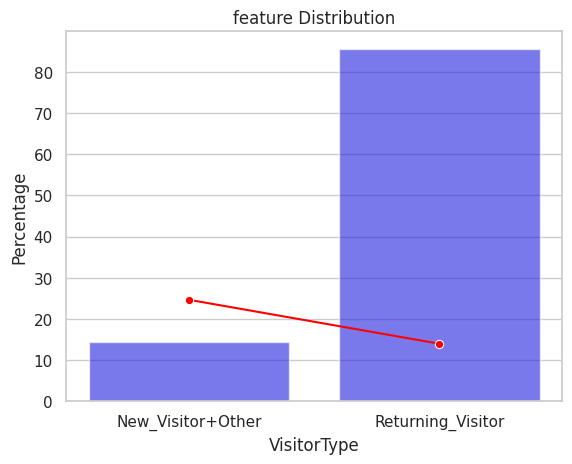

In [ ]:
plt_cat(sum_df = vt_comb, feature = 'VisitorType', target = 'Revenue')

In [ ]:
df2['Region'] = df2['Region'].astype('string')

In [ ]:
region = summary_cat(df2, 'Region', 'Revenue')

In [ ]:
calc_iv(df2, feature = 'Region', target = 'Revenue', pr=0)

0.005863742602202001

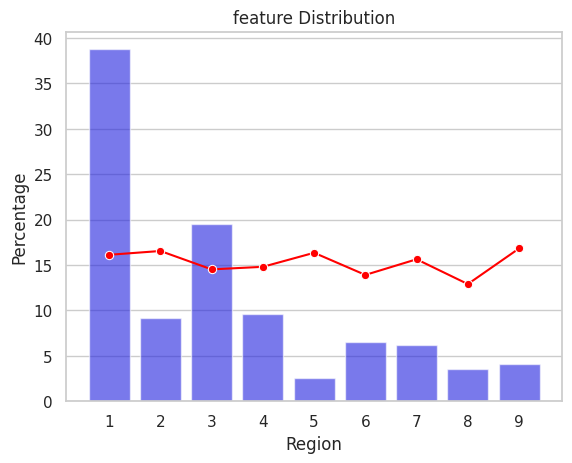

In [ ]:
plt_cat(sum_df = region, feature = 'Region', target = 'Revenue')

In [ ]:
calc_iv(df, feature = 'TrafficType', target = 'Revenue', pr=0)

0.2399681706721322

In [ ]:
df['TrafficType'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20])

In [ ]:
df2['TrafficType'].replace([12,14,15,16,17,18,19], 'other', inplace=True)
df2['TrafficType'] = df2['TrafficType'].astype('string')


In [ ]:
calc_iv(df2, feature = 'TrafficType', target = 'Revenue', pr=0)

0.24502110357145257

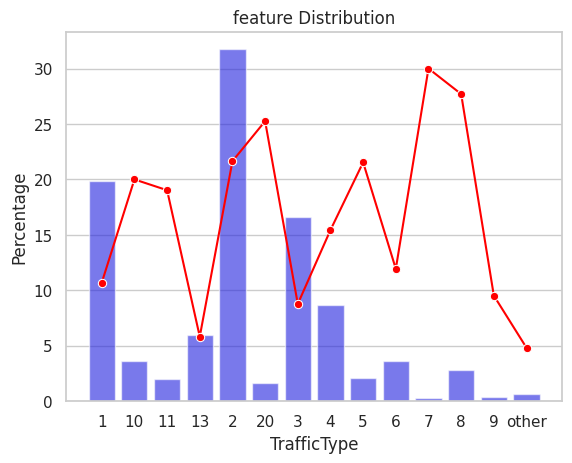

In [ ]:
df2['TrafficType'] = df2['TrafficType'].astype('string')
tt_comb = summary_cat(df2, 'TrafficType', 'Revenue')
plt_cat(sum_df = tt_comb, feature = 'TrafficType', target = 'Revenue')

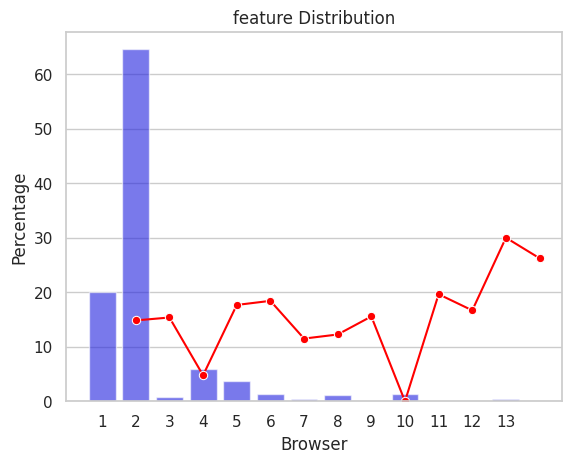

In [ ]:
b_comb = summary_cat(df2, 'Browser', 'Revenue')
plt_cat(sum_df = b_comb, feature = 'Browser', target = 'Revenue')

In [ ]:
calc_iv(df2, feature = 'Browser', target = 'Revenue', pr=0)

0.019391108606485734

In [ ]:
df3 = copy.copy(df2)

In [ ]:
df3['Browser'].replace([3,4,5,6,7,8,9,10,11,12,13], 'other', inplace=True)
df3['Browser'] = df3['Browser'].astype('string')

In [ ]:
calc_iv(df3, feature = 'Browser', target = 'Revenue', pr=0)

0.0020393035621322

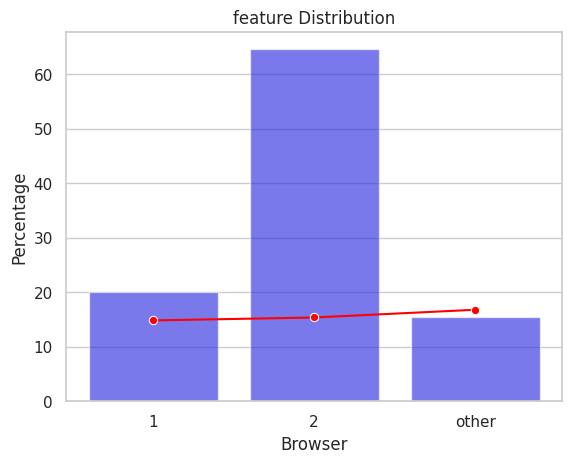

In [ ]:
b_comb = summary_cat(df3, 'Browser', 'Revenue')
plt_cat(sum_df = b_comb, feature = 'Browser', target = 'Revenue')

In [ ]:
def calculate_woe_iv(dataset, feature, target):
    # Obliczanie liczby dobrych i złych klientów
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset = dset[dset['All'] > 0]  # Usuwanie przypadków, gdy liczebność kategorii wynosi 0
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log((dset['Distr_Good'] + 0.0001) / (dset['Distr_Bad'] + 0.0001))  # Dodanie małej stałej, aby uniknąć dzielenia przez zero
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']

    iv = dset['IV'].sum()
    return iv
def binning_feature(dataset, feature, bins=10):
    return pd.cut(dataset[feature], bins, labels=range(bins), right=False)

In [ ]:
num_features2 = ["Administrative"]

In [ ]:
iv_results = {}

# Obliczanie IV dla każdej zmiennej
for f in num_features2:
    if df[feature].nunique() > 10:  # Założenie, że jeśli więcej niż 10 unikalnych wartości, to zmienna ciągła
        df[feature] = binning_feature(dataset = df, feature = f)
    iv_value = calculate_woe_iv(dataset = df, feature = f, target = 'Revenue')
    iv_results[feature] = iv_value

# Tworzenie DataFrame do wyświetlenia wyników
iv_table = pd.DataFrame(list(iv_results.items()), columns=['Feature', 'IV'])
iv_table = iv_table.sort_values(by='IV', ascending=False)  # Sortowanie tabeli od najwyższego IV

# Wyświetlenie tabeli
print(iv_table)

   Feature        IV
0  Weekend  0.259924


In [ ]:
df3

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Q1,"1,7",1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Q1,"2, 4, 5, 8",2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Q1,"2, 4, 5, 8",1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Q1,"3, 6",2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Q1,"3, 6",other,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Q4,"2, 4, 5, 8",other,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Q4,"3, 6",2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Q4,"3, 6",2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Q4,"2, 4, 5, 8",2,3,11,Returning_Visitor,False,False


In [ ]:
df3.to_csv('data.csv')

In [ ]:
calculate_woe_iv(dataset, feature, target)

NameError: name 'dataset' is not defined

In [ ]:
import pandas as pd
import numpy as np

def calculate_iv(df, feature, target, bins=10):
    # Binning the numerical variable
    df['bin'] = pd.qcut(df[feature], q=bins, duplicates='drop')

    # Calculating the number of events and non-events in each bin
    iv_df = df.groupby('bin').agg({target: ['sum', 'count']})
    iv_df.columns = ['event', 'total']
    iv_df['non_event'] = iv_df['total'] - iv_df['event']

    # Calculating event rate and non-event rate
    iv_df['event_rate'] = iv_df['event'] / iv_df['event'].sum()
    iv_df['non_event_rate'] = iv_df['non_event'] / iv_df['non_event'].sum()

    # Calculating Information Value for each bin
    iv_df['iv'] = (iv_df['event_rate'] - iv_df['non_event_rate']) * np.log(iv_df['event_rate'] / iv_df['non_event_rate'])

    # Summing IV for all bins to get the IV for the variable
    iv = iv_df['iv'].sum()

    return iv

In [ ]:
def calculate_iv_for_all_features(df, num_features, target, bins=10):
    iv_list = []
    for feature in num_features:
        iv = calculate_iv(df, feature, target, bins)
        iv_list.append((feature, iv))
    iv_df = pd.DataFrame(iv_list, columns=['feature', 'iv'])
    return iv_df

In [ ]:
num_featres_iv = calculate_iv_for_all_features(df = df3, num_features = num_features, target = 'Revenue', bins=10)

In [ ]:
num_featres_iv

,feature,iv
0,Administrative,0.149766
1,Administrative_Duration,0.224515
2,Informational,0.053471
3,Informational_Duration,0.057337
4,ProductRelated,0.393657
5,ProductRelated_Duration,0.472129
6,BounceRates,0.469363
7,ExitRates,0.791998
8,PageValues,2.362679
9,SpecialDay,0.073160


In [ ]:
num_featres_iv['feature']

0             Administrative
1    Administrative_Duration
2              Informational
3     Informational_Duration
4             ProductRelated
5    ProductRelated_Duration
6                BounceRates
7                  ExitRates
8                 PageValues
9                 SpecialDay
Name: feature, dtype: object

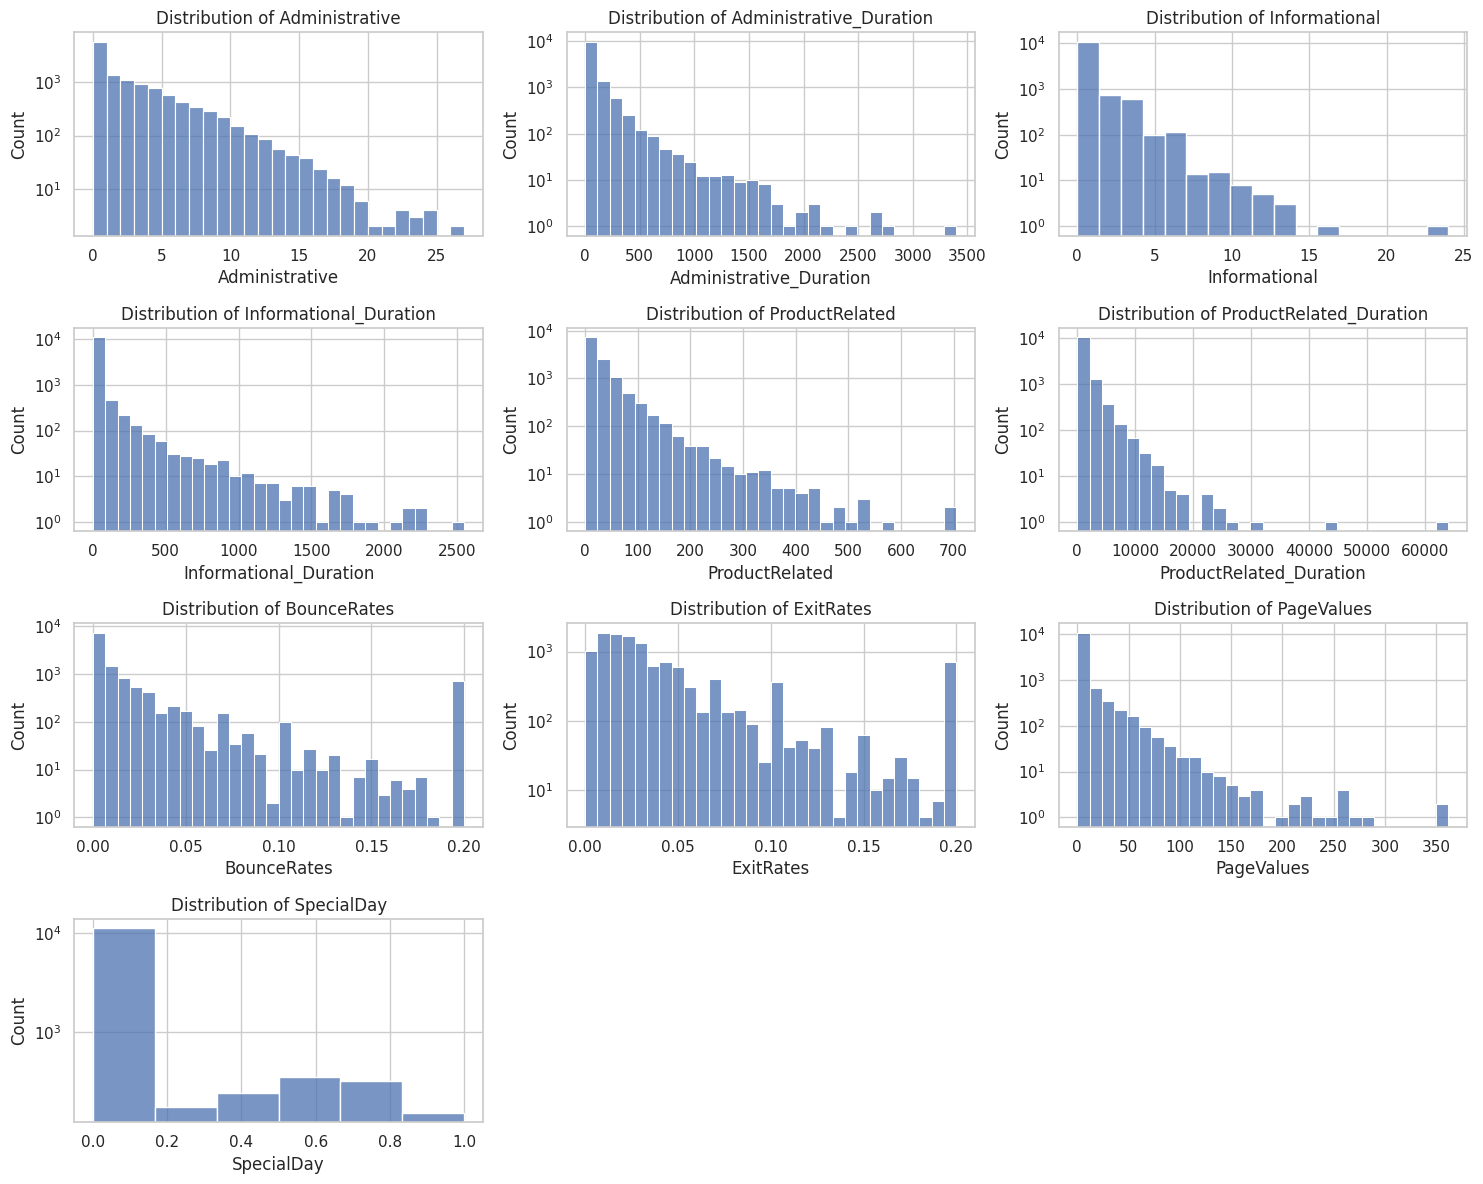

In [ ]:
# Setting up the matplotlib figure
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for plotting

plt.figure(figsize=(15, 12)) # Adjust figure size for better layout

# Plots for each numerical/categorical variable

# Calculate number of rows and columns for subplots
num_plots = len(num_features)
num_cols = 3  # Number of columns
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows

# Create a histogram for each numeric feature
for i, feature in enumerate(num_features):
    plt.subplot(num_rows, num_cols, i+1) # Use calculated number of rows
    if df3[feature].nunique() > 2:  # If the variable is continuous
        sns.histplot(df3[feature], bins=min(30, int(df3[feature].nunique())))
        plt.yscale('log')  # Applying logarithmic scale
    else:  # If the variable is categorical
        sns.countplot(x=feature, data=df3)
    plt.title(f'Distribution of {feature}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
df3['PageValues'].describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

In [ ]:
calculate_iv(df = df3, feature = 'Administrative', target = 'Revenue', bins=10)

0.1497656192994957

Boosting

In [ ]:
iv_results

{'Weekend': 0.2599243615337164}

Bagging

In [ ]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
finals_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'ExitRates', 'SpecialDay', 'Month', 'OperatingSystems', 'TrafficType', 'Weekend']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,  plot_importance
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=100,),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=6),
    "XGBoost": XGBClassifier(n_estimators=2000, random_state=0, learning_rate=0.02),


}

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)  # Use the same imputer fitted on training data
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Prawdopodobieństwa dla ROC AUC

    # Obliczanie metryk
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Zapisywanie wyników
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

    # Wyświetlanie raportu klasyfikacji i macierzy pomyłek
    print(f"{name} performance:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc_auc}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("\n")

# Prezentacja wyników w formie tabeli DataFrame
results_df = pd.DataFrame(results)
print(results_df)

NameError: name 'X_train' is not defined

In [ ]:
print(df3.columns)


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'bin'],
      dtype='object')


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  object  
 11  OperatingSystems         12330 non-null  object  
 12  Browser                  12330 non-null  string  
 13  Region                   12330 non-null  string  
 14  Traffi

In [ ]:
X = df3[finals_features]
y = df3['Revenue'] # Label

X.shape, y.shape

((12330, 9), (12330,))

In [ ]:
from sklearn.preprocessing import LabelEncoder
X_enc = X.copy()
y_enc = y.copy()
for col in X.columns:
    if X[col].dtypes == 'object' or X[col].dtypes == 'bool' or X[col].dtypes == 'string':
        # Przypisz wynik działania get_dummies do X_enc
        X_enc = pd.get_dummies(X_enc, columns=[col])

X_enc.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,ExitRates,SpecialDay,Month_Q1,Month_Q2,Month_Q3,Month_Q4,"OperatingSystems_1,7",...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_other,Weekend_False,Weekend_True
0,0.0,0.0,0.000000,0.20,0.0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,0.0,0.0,64.000000,0.10,0.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0.0,0.0,0.000000,0.20,0.0,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,0.0,0.0,2.666667,0.14,0.0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,0.0,0.0,627.500000,0.05,0.0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_enc,y_enc.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1908
Before OverSampling, counts of label '0': 10422 

After OverSampling, the shape of train_X: (20844, 28)
After OverSampling, the shape of train_y: (20844,) 

After OverSampling, counts of label '1': 10422
After OverSampling, counts of label '0': 10422


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size =0.3)

In [ ]:
finals_features

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated_Duration',
 'ExitRates',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'TrafficType',
 'Weekend']

In [ ]:
X_enc

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,ExitRates,SpecialDay,Month_Q1,Month_Q2,Month_Q3,Month_Q4,"OperatingSystems_1,7",...,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_other,Weekend_False,Weekend_True
0,0.0,0.0,0.000000,0.200000,0.0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,0.0,0.0,64.000000,0.100000,0.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0.0,0.0,0.000000,0.200000,0.0,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
3,0.0,0.0,2.666667,0.140000,0.0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,0.0,0.0,627.500000,0.050000,0.0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,145.0,0.0,1783.791667,0.029031,0.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
12326,0.0,0.0,465.750000,0.021333,0.0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
12327,0.0,0.0,184.250000,0.086667,0.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
12328,75.0,0.0,346.000000,0.021053,0.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size =0.3)

In [ ]:
X_enc_features = X_enc.columns.to_list()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
pred_test = model.predict(x_test)
lr_test = accuracy_score(y_test,pred_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression performance:
              precision    recall  f1-score   support

       False       0.82      0.81      0.81      3097
        True       0.81      0.82      0.82      3157

    accuracy                           0.81      6254
   macro avg       0.81      0.81      0.81      6254
weighted avg       0.81      0.81      0.81      6254

ROC AUC: 0.9082785623615852


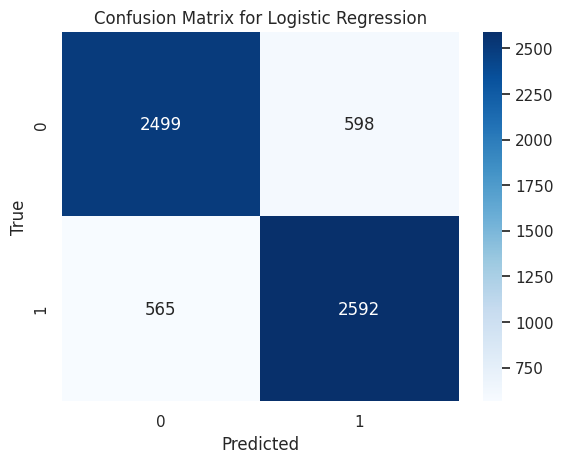



Decision Tree performance:
              precision    recall  f1-score   support

       False       0.74      0.74      0.74      3097
        True       0.75      0.74      0.74      3157

    accuracy                           0.74      6254
   macro avg       0.74      0.74      0.74      6254
weighted avg       0.74      0.74      0.74      6254

ROC AUC: 0.8043811799846357


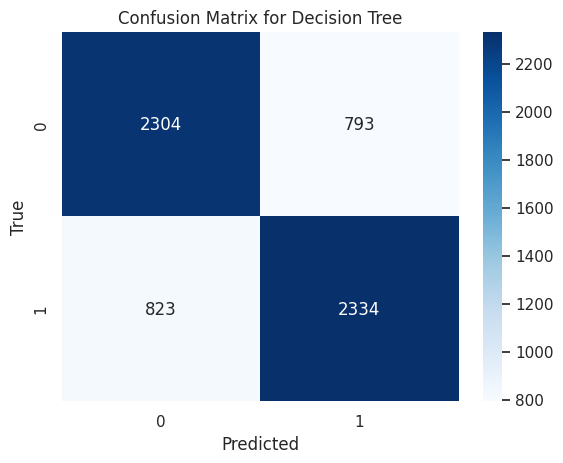



Random Forest performance:
              precision    recall  f1-score   support

       False       0.83      0.83      0.83      3097
        True       0.84      0.83      0.83      3157

    accuracy                           0.83      6254
   macro avg       0.83      0.83      0.83      6254
weighted avg       0.83      0.83      0.83      6254

ROC AUC: 0.9204773151984065


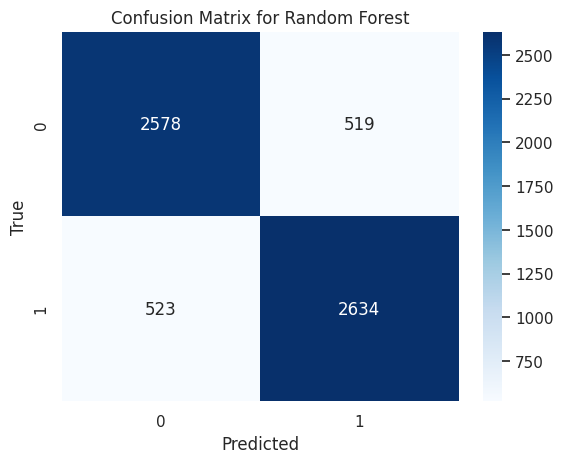



XGBoost performance:
              precision    recall  f1-score   support

       False       0.85      0.94      0.89      3097
        True       0.94      0.84      0.88      3157

    accuracy                           0.89      6254
   macro avg       0.89      0.89      0.89      6254
weighted avg       0.89      0.89      0.89      6254

ROC AUC: 0.9525030046856834


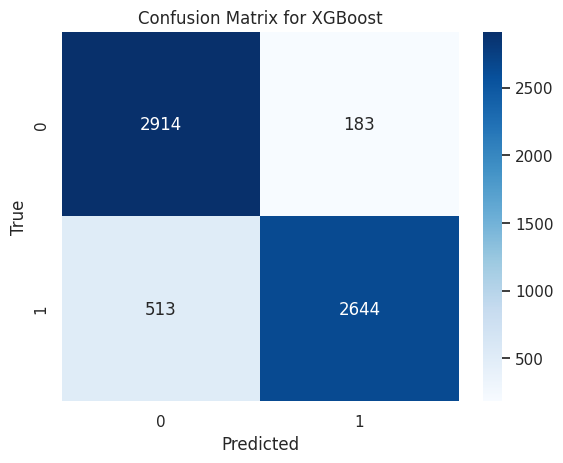



                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
0  Logistic Regression  0.814039   0.812539  0.821033  0.816764  0.908279   
1        Decision Tree  0.741605   0.746402  0.739309  0.742839  0.804381   
2        Random Forest  0.833387   0.835395  0.834336  0.834865  0.920477   
3              XGBoost  0.888711   0.935267  0.837504  0.883690  0.952503   

   Cross Validation  
0          0.819877  
1          0.740713  
2          0.835778  
3          0.895613  


In [ ]:
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]  # Prawdopodobieństwa dla ROC AUC

    # Obliczanie metryk
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cross_val = cross_val_score(model, x_train, y_train, cv=5).mean()
    # Zapisywanie wyników
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc,
        'Cross Validation': cross_val
    })

    # Wyświetlanie raportu klasyfikacji i macierzy pomyłek
    print(f"{name} performance:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc_auc}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("\n")

# Prezentacja wyników w formie tabeli DataFrame
results_df = pd.DataFrame(results)
print(results_df)

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC,Cross Validation
0,Logistic Regression,0.814039,0.812539,0.821033,0.816764,0.908279,0.819877
1,Decision Tree,0.741605,0.746402,0.739309,0.742839,0.804381,0.740713
2,Random Forest,0.833387,0.835395,0.834336,0.834865,0.920477,0.835778
3,XGBoost,0.888711,0.935267,0.837504,0.883690,0.952503,0.895613


In [ ]:
# Utworzenie DataFrame z wagami
coefs = pd.DataFrame(models["Logistic Regression"].coef_, columns=models["Logistic Regression"].feature_names_in_, index=['Waga'])

# Dodanie biasu jako oddzielnego wiersza
bias_series = pd.Series(models["Logistic Regression"].intercept_, index=['Wyraz Wolny'])
coefs = pd.concat([coefs, bias_series.rename('Waga').to_frame().T])

# Wyświetlenie tabeli z wagami i biasem
print(coefs)

# Wizualizacja wag za pomocą wykresu słupkowego
coefs_plot = coefs.drop('Waga')  # Wykluczając bias z wizualizacji
plt.figure(figsize=(10, 6))
# Use .T to transpose and access 'Waga' as a column
sns.barplot(x=coefs_plot.T.index, y=coefs_plot.T['Waga'])
plt.title('Wizualizacja wag w modelu regresji logistycznej')
plt.ylabel('Wartość wagi')
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45)
plt.show()

      Administrative_Duration  Informational_Duration  \
Waga                 0.000456                0.000846   
Waga                      NaN                     NaN   

      ProductRelated_Duration  ExitRates  SpecialDay  Month_Q1  Month_Q2  \
Waga                 0.000134  -1.045696   -1.091802  0.305616  2.394506   
Waga                      NaN        NaN         NaN       NaN       NaN   

      Month_Q3  Month_Q4  OperatingSystems_1,7  ...  TrafficType_4  \
Waga  2.558435  2.252377              1.443635  ...       2.270023   
Waga       NaN       NaN                   NaN  ...            NaN   

      TrafficType_5  TrafficType_6  TrafficType_7  TrafficType_8  \
Waga       0.994708       0.434835       0.285859       1.919263   
Waga            NaN            NaN            NaN            NaN   

      TrafficType_9  TrafficType_other  Weekend_False  Weekend_True  \
Waga      -0.053621          -0.130402       0.482052       0.91347   
Waga            NaN                NaN   

KeyError: 'Waga'

<Figure size 1000x600 with 0 Axes>

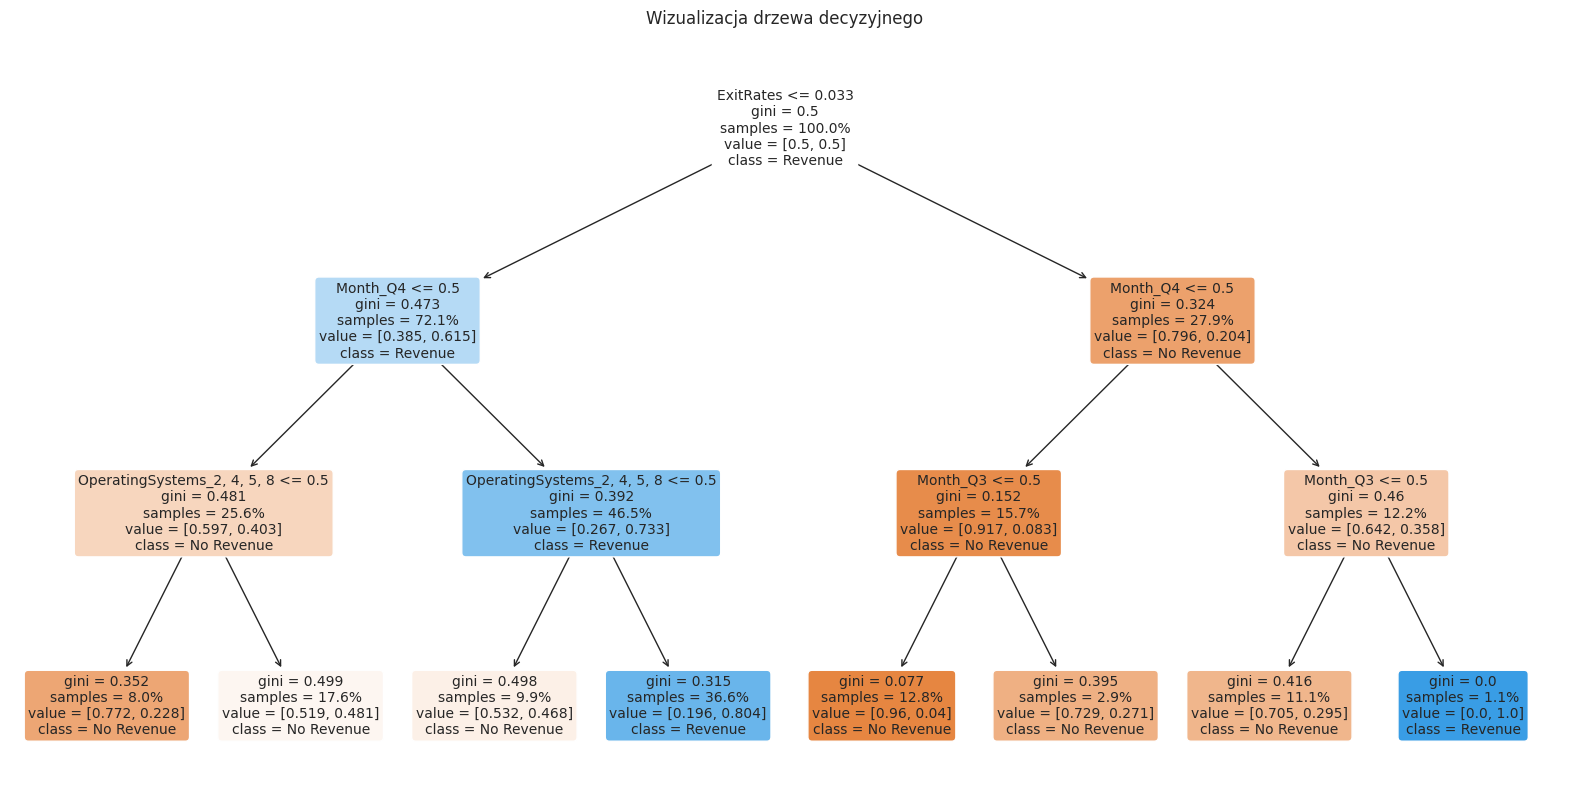

In [ ]:
# Wizualizacja drzewa decyzyjnego
# Make sure feature_names matches the features used during training
feature_names = models["Decision Tree"].feature_names_in_

class_names = ['No Revenue', 'Revenue']  # Nazwy klas

plt.figure(figsize=(20, 10))
plot_tree(models["Decision Tree"], feature_names=feature_names,
          class_names=class_names, filled=True, rounded=True,
          fontsize=10,proportion=True)
plt.title('Wizualizacja drzewa decyzyjnego')
plt.show()

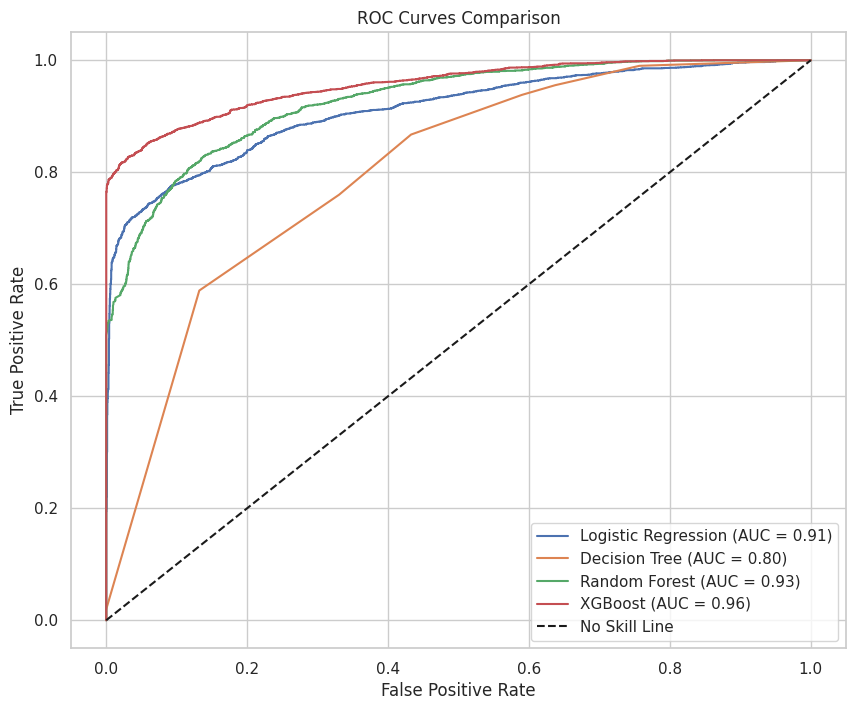

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Obliczanie prawdopodobieństw i krzywych ROC
    probabilities = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    roc_auc = auc(fpr, tpr)

    # Rysowanie krzywej ROC dla modelu
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()

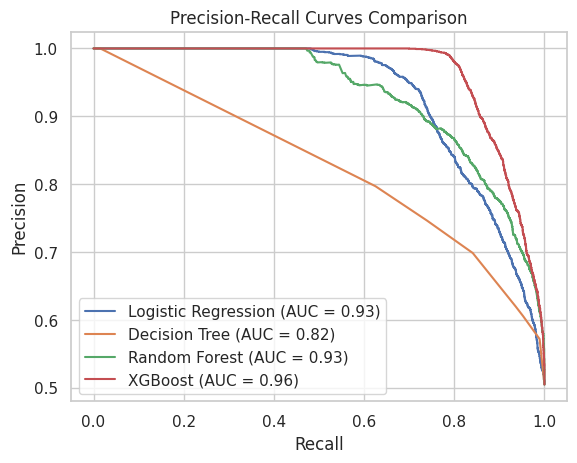

In [ ]:
# Generowanie i rysowanie krzywych Precision-Recall dla każdego modelu
for name, model in models.items():
    probabilities = model.predict_proba(x_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, probabilities)
    auc_score = auc(recall, precision)

    plt.plot(recall, precision, label=f'{name} (AUC = {auc_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves Comparison')
plt.legend(loc="lower left")
plt.show()

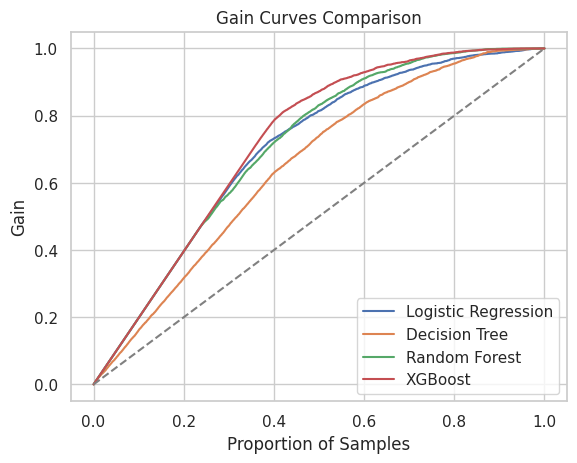

In [ ]:
def calculate_gain(y_true, y_prob):
    sorted_indices = np.argsort(y_prob)[::-1]
    sorted_true = y_true[sorted_indices]
    cumulative_gains = np.cumsum(sorted_true) / np.sum(sorted_true)
    cumulative_total = np.arange(1, len(y_true) + 1) / len(y_true)
    return cumulative_total, cumulative_gains

# Generowanie i rysowanie krzywych gain dla każdego modelu
for name, model in models.items():
    probabilities = model.predict_proba(x_test)[:, 1]
    total, gains = calculate_gain(y_test, probabilities)

    plt.plot(total, gains, label=f'{name}')

# Dodanie linii referencyjnej
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

plt.xlabel('Proportion of Samples')
plt.ylabel('Gain')
plt.title('Gain Curves Comparison')
plt.legend(loc="lower right")
plt.show()

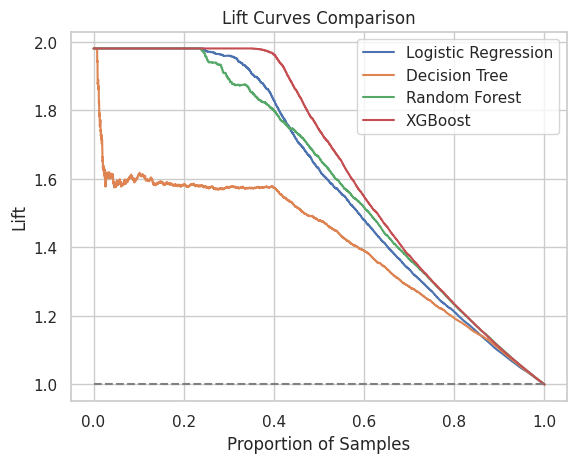

In [ ]:
def calculate_lift(y_true, y_prob):
    sorted_indices = np.argsort(y_prob)[::-1]
    sorted_true = y_true[sorted_indices]
    cumulative_gains = np.cumsum(sorted_true) / np.sum(sorted_true)
    cumulative_total = np.arange(1, len(y_true) + 1) / len(y_true)
    lift = cumulative_gains / cumulative_total
    return cumulative_total, lift

# Generowanie i rysowanie krzywych lift dla każdego modelu
for name, model in models.items():
    probabilities = model.predict_proba(x_test)[:, 1]
    total, lift = calculate_lift(y_test, probabilities)

    plt.plot(total, lift, label=f'{name}')

# Dodanie linii referencyjnej
plt.plot([0, 1], [1, 1], linestyle='--', color='grey')

plt.xlabel('Proportion of Samples')
plt.ylabel('Lift')
plt.title('Lift Curves Comparison')
plt.legend(loc="upper right")
plt.show()